<a href="https://www.kaggle.com/code/neenues/multi-class-prediction-of-cirrhosis-score-0-468" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Multi-Class Prediction of Cirrhosis](https://www.kaggle.com/competitions/playground-series-s3e26)
### Playground Series - Season 3, Episode 26.
_______________________________________________________________________ 
# Author Details:
- Name: Neenu E S
- Profiles: [Github](https://github.com/neenu05) | [LinkedIn](https://www.linkedin.com/in/neenues/) | [Kaggle](https://www.kaggle.com/neenues)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:
[Walter Reade, Ashley Chow. (2023). Multi-Class Prediction of Cirrhosis Outcomes. Kaggle.](https://kaggle.com/competitions/playground-series-s3e26)
__________________________________________________________________________
# Code Execution : 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/neenues/multi-class-prediction-of-cirrhosis-score-0-468/edit/run/157941775)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
data_train =  pd.read_csv('train.csv')
data_train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
data_train.isnull().sum()  ## no null values

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [4]:
data_test =  pd.read_csv('test.csv')
data_test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [5]:
#Checking the dataset description
describe = data_train.describe()
describe.transpose()

,count,mean,std,min,25%,50%,75%,max
id,7905.0,3952.000000,2282.121272,0.00,1976.00,3952.00,5928.00,7904.00
N_Days,7905.0,2030.173308,1094.233744,41.00,1230.00,1831.00,2689.00,4795.00
Age,7905.0,18373.146490,3679.958739,9598.00,15574.00,18713.00,20684.00,28650.00
Bilirubin,7905.0,2.594485,3.812960,0.30,0.70,1.10,3.00,28.00
Cholesterol,7905.0,350.561923,195.379344,120.00,248.00,298.00,390.00,1775.00
Albumin,7905.0,3.548323,0.346171,1.96,3.35,3.58,3.77,4.64
Copper,7905.0,83.902846,75.899266,4.00,39.00,63.00,102.00,588.00
Alk_Phos,7905.0,1816.745250,1903.750657,289.00,834.00,1181.00,1857.00,13862.40
SGOT,7905.0,114.604602,48.790945,26.35,75.95,108.50,137.95,457.25
Tryglicerides,7905.0,115.340164,52.530402,33.00,84.00,104.00,139.00,598.00


Status
C     4965
D     2665
CL     275
Name: count, dtype: int64


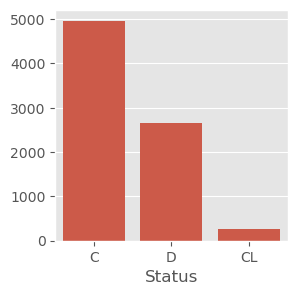

In [6]:
cirrhosis_counts = data_train['Status'].value_counts()
print(cirrhosis_counts)
fig, ax = plt.subplots(figsize=(3, 3))
fig = sns.barplot(x= cirrhosis_counts.index, y= cirrhosis_counts.values, ax=ax)

    C (censored) indicates the patient was alive at N_Days.
    D indicates the patient was deceased at N_Days.
    CL indicates the patient was alive at N_Days due to liver a transplant.

In [7]:
X=data_train.iloc[:,1:-1].values #  first and last columns not inculded
y=data_train.iloc[:,-1].values  # only last - target

X_test=data_test.iloc[:,1:].values  # only first column not inculded  

In [8]:
## convert to numberical values
for i in range(X.shape[1]):
    label_encoder = LabelEncoder()
    X_test[:,i] = label_encoder.fit_transform(X_test[:, i])
    X[:,i] = label_encoder.fit_transform(X[:, i])
    

In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X[:,1:])
X_test = sc.transform(X_test[:,1:])

In [11]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(X, y)
r_pred = r_clf.predict(X)
r_probabilty = r_clf.predict_proba(X)

r_acc = accuracy_score(y, r_pred)
#accuracy_list.append(100*r_acc)
accuracy_list = 100*r_acc

In [12]:
print("Accuracy : ",accuracy_list)

Accuracy :  98.25426944971537


In [13]:
# Calculate log loss
logloss = log_loss(y, r_probabilty)
print(f'Log Loss: ', logloss)

Log Loss:  0.15088120196000607


In [14]:
y_predict = r_clf.predict_proba(X_test)
#print(y_predict)

In [15]:
result = np.column_stack((data_test.iloc[:, 0], y_predict))
result = pd.DataFrame(result, columns=['id', 'Status_C', 'Status_CL', 'Status_D'])
print(result)

           id  Status_C  Status_CL  Status_D
0      7905.0  0.741331   0.029454  0.229216
1      7906.0  0.744609   0.086693  0.168698
2      7907.0  0.233333   0.070065  0.696602
3      7908.0  0.873091   0.003527  0.123383
4      7909.0  0.582465   0.083305  0.334231
...       ...       ...        ...       ...
5266  13171.0  0.793863   0.109116  0.097021
5267  13172.0  0.927463   0.024103  0.048434
5268  13173.0  0.887305   0.015418  0.097277
5269  13174.0  0.976141   0.003699  0.020160
5270  13175.0  0.219981   0.060750  0.719269

[5271 rows x 4 columns]


In [16]:
result["id"] = result["id"].apply(np.int32) # convert type of id to int

In [17]:
result.to_csv('output.csv', index=False)
result.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.741331,0.029454,0.229216
1,7906,0.744609,0.086693,0.168698
2,7907,0.233333,0.070065,0.696602
3,7908,0.873091,0.003527,0.123383
4,7909,0.582465,0.083305,0.334231
